# Lecture 07의 데모

### Lecture 07의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec09.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec10.ipynb

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histogram Example

In [ ]:
# From https://womenintheworld.org/highest-paid-actress/
incomes = Table.read_table('2022_female_actors.csv')
incomes.show(3)

Name,Income (millions)
Scarlett Johansson,56
Sofia Vergara,43
Angelina Jolie,35.5


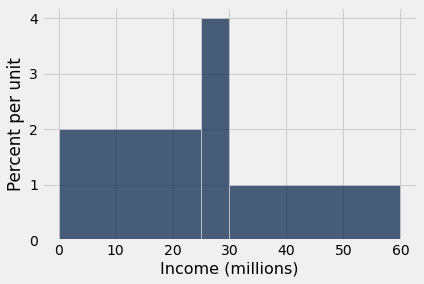

In [ ]:
my_bins = make_array(0, 25, 30, 60)
incomes.hist('Income (millions)', bins=my_bins)

In [ ]:
incomes.column('Income (millions)').min()

12.5

([<matplotlib.axis.XTick at 0x7fc840fec4d0>,
 <a list of 4 Text major ticklabel objects>)

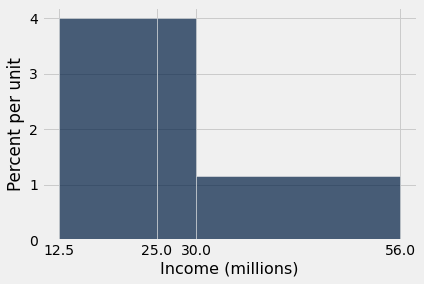

In [ ]:
my_bins = make_array(incomes.column('Income (millions)').min(),25,30,incomes.column('Income (millions)').max())
incomes.hist('Income (millions)',bins = my_bins)

# xticks 쓰면 첫 bins 값부터 나오게 된다.
plots.xticks(my_bins)

## Defining Functions

Example: Create a function that takes a numerical input and triples it: triple($x$) = $3 x$

In [ ]:
def triple(anything):
    return 3 * anything

In [ ]:
triple(3)

9

아래 x는 위 함수의 인자로 사용되더라도, 함수가 호출되어 인자 x에 3이 배정되더라도 여전히 undefined name이다.

In [ ]:
triple(4)

12

In [ ]:
y = 7
triple(y)

21

In [ ]:
# evaluation된 다음에 대입이 되게 된다.
triple(2+y)

27

## The Anatomy of a Function

In [ ]:
def function_name(arguments):
    ...
    return return_expression

## Functions are Type-Agnostic

In [ ]:
# Type-Agonstic: Type을 무시하고 정의를 하고 인수가 들어왔을때 해당 타입 처리가 가능하면 처리해버림
triple('ha')

'hahaha'

In [ ]:
'ha' + triple('ha')

'hahahaha'

In [ ]:
nums = make_array(3,4,5,6)
triple(nums)

array([ 9, 12, 15, 18])

## Discussion

In [ ]:
# s is an array of numbers
# this returns the percent of the total for each element
def percent_of_total(s):
  """
    s is an array of numbers
    this returns the percent of the total of numbers
  """

  return np.round(s / sum(s) * 100, 2)

In [ ]:
percent_of_total(make_array(1,2,3,4))

array([ 10.,  20.,  30.,  40.])

## Functions Can Take Multiple Arguments

Example: Calculate the Hypotenuse Length of a Right Triangle

Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$h^2$ = $x^2$ + $y^2$ which implies $h = \sqrt{x^2 + y^2}$

In [ ]:
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [ ]:
hypotenuse(3,4)

5.0

We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [ ]:
def hypotenuse(x, y):
    return (x ** 2 + y ** 2) ** 0.5

In [ ]:
hypotenuse(9, 12)

## **Example: A function that takes the year of birth of a person and produces their age in years.**

In [ ]:
def age(year):
    age = 2022 - year
    return age

In [ ]:
age(1942)

80

Now add some bells and whistles: Take person's name and year of birth (two arguments). Produce a sentence that states how old they are.

In [ ]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [ ]:
name_and_age('John', 1982)

'John is 40 years old.'

## **Apply**

In [ ]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [ ]:
# table_name.apply(function_name, column_label(s))
# 첫 인자로 함수로 받고 뒤에 함수 인자로 들어갈 열들을 입력함. 결과로 배열을 return.
# 개신기함 OㅁO)!!
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 37 years old.', 'Pam is 34 years old.',
       'Michael is 55 years old.', 'Creed is 118 years old.'],
      dtype='<U24')

In [ ]:
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


## Prediction

In [ ]:
# Prediction은 아빠키랑 엄마키가 이러면 애들의 키는 어떨까~하고 추측 가능
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [ ]:
parent_avgs = (families.column('father')+families.column('mother'))/2
parent_avgs

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [ ]:
# 결과로 cm를 반환해준다.
def inches2cm(inches):
  return inches * 2.54

In [ ]:
inches2cm(parent_avgs)

array([ 184.785,  184.785,  184.785,  184.785,  180.34 ,  180.34 ,
        180.34 ,  180.34 ,  176.53 ,  176.53 ,  176.53 ,  176.53 ,
        176.53 ,  176.53 ,  176.53 ,  169.545,  169.545,  169.545,
        169.545,  169.545,  169.545,  180.34 ,  180.34 ,  180.34 ,
        180.34 ,  180.34 ,  180.34 ,  180.34 ,  178.435,  178.435,
        178.435,  178.435,  177.165,  172.72 ,  172.72 ,  172.72 ,
        172.72 ,  172.72 ,  172.72 ,  172.72 ,  172.72 ,  171.45 ,
        177.8  ,  177.8  ,  177.8  ,  177.8  ,  177.165,  177.165,
        177.165,  175.26 ,  175.26 ,  175.26 ,  175.26 ,  175.26 ,
        175.26 ,  175.26 ,  175.26 ,  175.26 ,  174.625,  174.625,
        174.625,  174.625,  174.625,  174.625,  173.99 ,  173.99 ,
        173.99 ,  172.974,  179.959,  179.959,  179.959,  179.959,
        179.959,  179.959,  179.959,  179.959,  177.8  ,  177.8  ,
        177.8  ,  176.53 ,  176.53 ,  176.53 ,  173.99 ,  173.99 ,
        173.99 ,  173.99 ,  173.99 ,  173.99 ,  173.99 ,  174.

In [ ]:
heights = Table().with_columns(
    'Parent Average', inches2cm(parent_avgs),
    'Child', inches2cm(families.column('child')),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
184.785,185.928,male
184.785,175.768,female
184.785,175.26,female
184.785,175.26,female
180.34,186.69,male
180.34,184.15,male
180.34,166.37,female
180.34,166.37,female
176.53,180.34,male
176.53,172.72,female


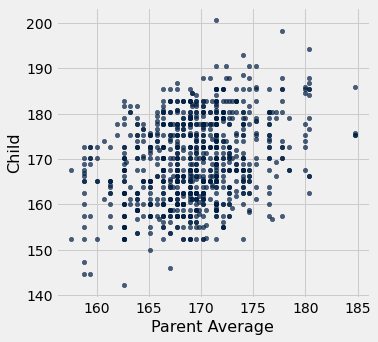

In [ ]:
heights.scatter('Parent Average', 'Child')

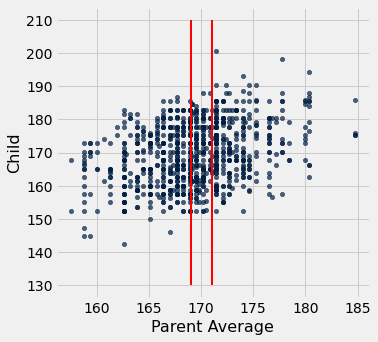

In [ ]:
heights.scatter('Parent Average', 'Child')

# plots.plot( x범위, y범위, option.. )
# 이 구간의 평균을 가지고 이제 prediction 해볼것임
plots.plot([169, 169], [130, 210], color='red', lw=2)
plots.plot([171, 171], [130, 210], color='red', lw=2);

In [ ]:
nearby = heights.where('Parent Average', are.between(170-1, 170+1))

In [ ]:
nearby_mean = np.mean(nearby.column('Child'))
print(nearby_mean)

169.765406452


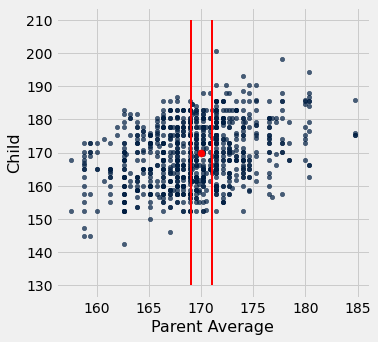

In [ ]:
heights.scatter('Parent Average', 'Child')
plots.plot([169, 169], [130, 210], color='red', lw=2)
plots.plot([171, 171], [130, 210], color='red', lw=2)
plots.scatter(170, nearby_mean, color='red', s=50);

In [ ]:
def predict(parent_avgs):
    nearby = heights.where('Parent Average', are.between(parent_avgs-1, parent_avgs+1))
    nearby_mean = np.mean(nearby.column('Child'))
    return nearby_mean

In [ ]:
predict(170)

169.76540645161293

In [ ]:
predicted_heights = heights.apply(predict, 'Parent Average')
predicted_heights

array([ 178.054     ,  178.054     ,  178.054     ,  178.054     ,
        178.85610526,  178.85610526,  178.85610526,  178.85610526,
        172.68092308,  172.68092308,  172.68092308,  172.68092308,
        172.68092308,  172.68092308,  172.68092308,  169.28846   ,
        169.28846   ,  169.28846   ,  169.28846   ,  169.28846   ,
        169.28846   ,  178.85610526,  178.85610526,  178.85610526,
        178.85610526,  178.85610526,  178.85610526,  178.85610526,
        176.53      ,  176.53      ,  176.53      ,  176.53      ,
        174.39773684,  172.07935556,  172.07935556,  172.07935556,
        172.07935556,  172.07935556,  172.07935556,  172.07935556,
        172.07935556,  171.88930818,  175.9839    ,  175.9839    ,
        175.9839    ,  175.9839    ,  174.39773684,  174.39773684,
        174.39773684,  173.64587097,  173.64587097,  173.64587097,
        173.64587097,  173.64587097,  173.64587097,  173.64587097,
        173.64587097,  173.64587097,  172.68967164,  172.68967

In [ ]:
heights = heights.with_column('Prediction',predicted_heights)
heights

Parent Average,Child,Sex,Prediction
184.785,185.928,male,178.054
184.785,175.768,female,178.054
184.785,175.26,female,178.054
184.785,175.26,female,178.054
180.34,186.69,male,178.856
180.34,184.15,male,178.856
180.34,166.37,female,178.856
180.34,166.37,female,178.856
176.53,180.34,male,172.681
176.53,172.72,female,172.681


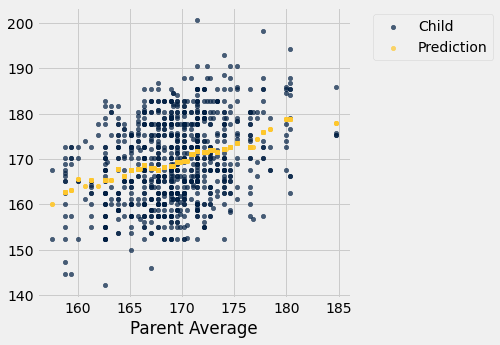

In [ ]:
# scatter(0) 첫 번째것을 기준으로 그려라
heights.select('Parent Average', 'Child', 'Prediction').scatter(0)

## Prediction Accuracy

In [ ]:
def difference(x, y):
  return x-y

In [ ]:
# 각각에 대한 error를 구할 수 있다.
pred_errs = heights.apply(difference, 'Prediction', 'Child')
heights = heights.with_column('Errors', pred_errs)
heights.show(3)

Parent Average,Child,Sex,Prediction,Errors
184.785,185.928,male,178.054,-7.874
184.785,175.768,female,178.054,2.286
184.785,175.26,female,178.054,2.794


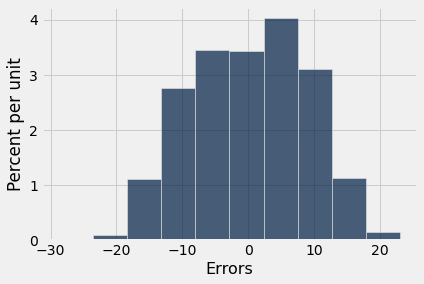

In [ ]:
heights.hist('Errors')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


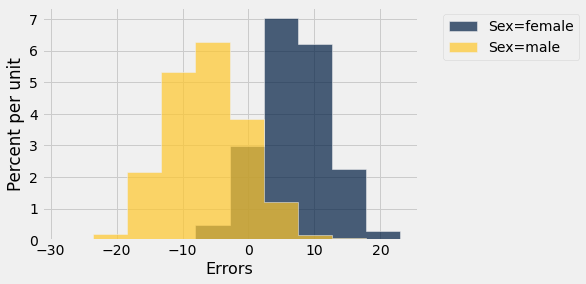

In [ ]:
# 남자는 prediction 보다 크고 여자는 prediction 보다 작다.
# 자녀의 성별에 따른 구분을 하여 prediction을 하지 않아서 아래와 같이 오차 범위가 발생하는것임
heights.hist('Errors', group='Sex')

## Discussion Question

In [ ]:
# 성별을 같이 줘보자 / 같은 성별의 사람만 뽑아서 평균을 낸다.
# 더 똑똑한 prediction
def predict_smarter(parent_avgs, s):
    nearby = heights.where('Parent Average', are.between(parent_avgs-1, parent_avgs+1))
    nearby_same_sex = nearby.where('Sex',s)
    nearby_mean = np.mean(nearby_same_sex.column('Child'))
    return nearby_mean

In [ ]:
predict_smarter(170,'female')

162.57763888888888

In [ ]:
predict_smarter(170, 'male')

176.00057831325304

In [ ]:
predict(170)

169.76540645161293

In [ ]:
smarter_predictions = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Preds', smarter_predictions)
heights

Parent Average,Child,Sex,Prediction,Errors,Smarter Preds
184.785,185.928,male,178.054,-7.874,185.928
184.785,175.768,female,178.054,2.286,175.429
184.785,175.26,female,178.054,2.794,175.429
184.785,175.26,female,178.054,2.794,175.429
180.34,186.69,male,178.856,-7.83389,186.662
180.34,184.15,male,178.856,-5.29389,186.662
180.34,166.37,female,178.856,12.4861,171.831
180.34,166.37,female,178.856,12.4861,171.831
176.53,180.34,male,172.681,-7.65908,178.816
176.53,172.72,female,172.681,-0.0390769,166.546


In [ ]:
smart_errs = heights.apply(difference, 'Smarter Preds', 'Child')
heights = heights.with_column('Smarter Errors', smart_errs)

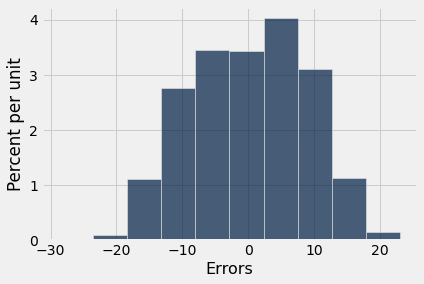

In [ ]:
heights.hist('Errors')

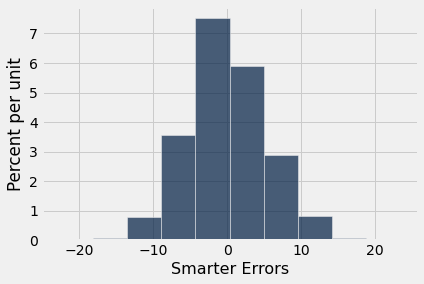

In [ ]:
heights.hist('Smarter Errors')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


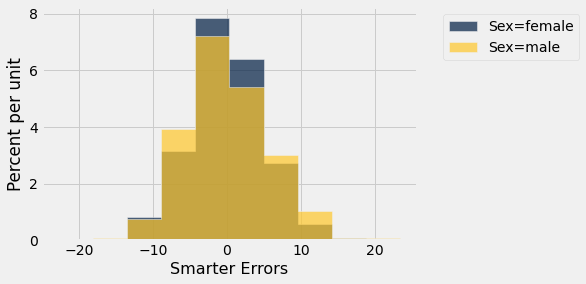

In [ ]:
# 부모의 평균키로 자식 키로 영향을 주는걸 계산할때 male의 variation이 더 크다.
heights.hist('Smarter Errors', group='Sex')